<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_Classification_Arvore_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install plotly --upgrade

     |████████████████████████████████| 23.9 MB 1.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
#EXPLORAÇÃO DE DADOS
base_credit = pd.read_csv('/content/credit_data.csv')

In [6]:
base_credit.head()

clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0
1         2  34415.153966  48.117153  6564.745018        0
2         3  57317.170063  63.108049  8020.953296        0
3         4  42709.534201  45.751972  6103.642260        0
4         5  66952.688845  18.584336  8770.099235        1

In [7]:
base_credit.describe()

clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     577.494589  14326.327119    13.624469   3045.410024     0.348624
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     500.750000  32796.459717    28.990415   1939.708847     0.000000
50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000
75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

In [8]:
base_credit[base_credit['income'] >= 69995.685578]

clientid        income        age         loan  default
422       423  69995.685578  52.719673  2084.370861        0

In [9]:
#VISUALIZAO DE DADOS
np.unique(base_credit['default'], return_counts = True)  # teremos 1717 pessoas que pagam o emprestimo(0) e 283 que nao pagam(1)

(array([0, 1]), array([1717,  283]))

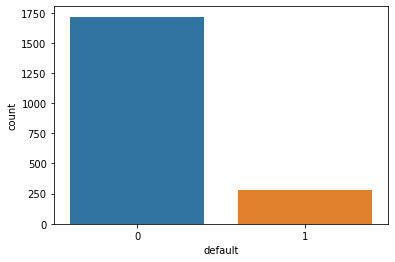

In [10]:
sns.countplot( x = base_credit['default']);

(array([  1.,   1.,   1.,   0.,   0.,   0., 499., 467., 514., 514.]),
 array([-52.42327992, -40.78377234, -29.14426477, -17.50475719,
         -5.86524962,   5.77425796,  17.41376554,  29.05327311,
         40.69278069,  52.33228827,  63.97179584]),
 <a list of 10 Patch objects>)

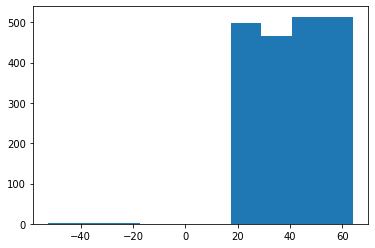

In [11]:
plt.hist(x = base_credit['age'])  #histograma separando os dados pela idade # (AQUI A IDADES NEGATIVAS JA FORAM SUBSTITUIDAS PELO VALOR DA MEDIA)

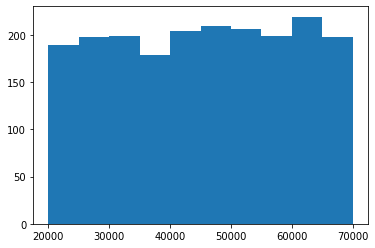

In [12]:
plt.hist(x = base_credit['income']);

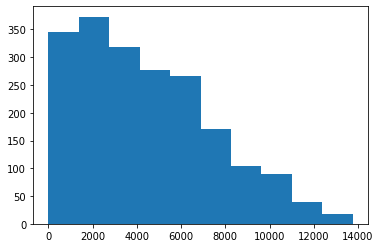

In [13]:
plt.hist(x = base_credit['loan']);

In [14]:
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default')

In [15]:
grafico.show()

In [16]:
#TRATAMENTO DE DADOS INCONSISTENTES
base_credit.loc[base_credit['age']<0]

clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [17]:
#para apagar a coluna inteira age, basta
base_credit2 = base_credit.drop('age', axis =1)
base_credit2

clientid        income         loan  default
0            1  66155.925095  8106.532131        0
1            2  34415.153966  6564.745018        0
2            3  57317.170063  8020.953296        0
3            4  42709.534201  6103.642260        0
4            5  66952.688845  8770.099235        1
...        ...           ...          ...      ...
1995      1996  59221.044874  1926.729397        0
1996      1997  69516.127573  3503.176156        0
1997      1998  44311.449262  5522.786693        1
1998      1999  43756.056605  1622.722598        0
1999      2000  69436.579552  7378.833599        0

[2000 rows x 4 columns]

In [18]:
#porem eh melhor apagar só os registros com valor inconsistente, pois sao so 3
base_credit3 = base_credit.drop(base_credit[base_credit['age']< 0].index)  # precisa por INDEX pra realmente indicar quais sao os indices que serao apagados
base_credit3


clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[1997 rows x 5 columns]

In [19]:
# o melhor jeito é preencher manualmente os dados inconsistentes
#preencher os valores com a media
base_credit.mean()

clientid     1000.500000
income      45331.600018
age            40.807559
loan         4444.369695
default         0.141500
dtype: float64

In [20]:
base_credit3.mean()  # aqui ja fointirado as idades negativas

clientid     1001.970456
income      45326.596720
age            40.927700
loan         4442.124566
default         0.141713
dtype: float64

In [21]:
#entao vamos fazer a base_credit ter a coluna idade com todos os dados de novo só que agora aruumando colocando as idades negativas com a media das idades
base_credit.loc[base_credit['age']<0, 'age']= 40.92 # valor 40.92 encontrado acima na media

In [22]:
#TRATAMENTO DE VALORES FALTANTES 
base_credit.isnull()


clientid  income    age   loan  default
0        False   False  False  False    False
1        False   False  False  False    False
2        False   False  False  False    False
3        False   False  False  False    False
4        False   False  False  False    False
...        ...     ...    ...    ...      ...
1995     False   False  False  False    False
1996     False   False  False  False    False
1997     False   False  False  False    False
1998     False   False  False  False    False
1999     False   False  False  False    False

[2000 rows x 5 columns]

In [23]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [24]:
base_credit.loc[pd.isnull(base_credit['age'])]

clientid        income  age         loan  default
28        29  59417.805406  NaN  2082.625938        0
30        31  48528.852796  NaN  6155.784670        0
31        32  23526.302555  NaN  2862.010139        0

In [25]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True) # corrigimos os clinetes que estavam sem idade substituindo pela media das idades

In [26]:
base_credit.loc[pd.isnull(base_credit['age'])]

Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

In [27]:
#verificando #valores faltantes agora estao com a media
base_credit.loc[(base_credit['clientid']== 29)|(base_credit['clientid']== 31)| (base_credit['clientid'] ==32)]

clientid        income        age         loan  default
28        29  59417.805406  40.927689  2082.625938        0
30        31  48528.852796  40.927689  6155.784670        0
31        32  23526.302555  40.927689  2862.010139        0

In [28]:
#DIVISAO ENTRE PEVISORES E CLASSE

#atributos unicos como id nao entram nos previsores pois nao faz sentido jogar esse dado no algoritimo, ex: toda maria paga o emprestimo? nao ne..

#PREVISORE SAO OS DADOS HISTORICOS COMO INCOME, AGE E LOAN, A CLASSE É O DEFAULT, NO QUAL SABEREMOS NO FUTURO QUEM DEVE PAGAR OU NAO

x_credit = base_credit.iloc[:, 1:4].values # selecionamos do 1 ao 3 pois estamos definindo um intervalotypa # clientid é o "0" e default é o "4"

In [29]:
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [30]:
type(x_credit)

numpy.ndarray

In [31]:
Y_credit = base_credit.iloc[:,4].values # aqui ele pega só indice 4 que á classe default

In [32]:
type(Y_credit)

numpy.ndarray

In [33]:
#ESCALONAMENTO DOS VALORES

x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()  #menor renda,menor idade, menor emprestimo


(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [34]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max() #maior renda, maior idade, maioremprestimo

(69995.6855783239, 63.97179584112021, 13766.051239333701)

In [35]:
#padronalização pra deixar os valores na mesma escala, para que o algoritimo nao pense que algum atributo é mais importante do que outro

from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [36]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()  #note tudo na mesma escala agora, nao importa que tao negativos pois esta padronizado com a media e o desvio padrao


(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [37]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max() #note tudo na mesma escala agora

(1.7220222385319197, 1.7393673928651971, 3.0616609141708273)

In [38]:
x_credit  #valores escalonados

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

In [39]:
#NOVA BASE DE DADOS:
#EXPLORAÇÃO DE DADOS

base_census = pd.read_csv('/content/census.csv')



In [40]:
base_census

age          workclass  ...  native-country  income
0       39          State-gov  ...   United-States   <=50K
1       50   Self-emp-not-inc  ...   United-States   <=50K
2       38            Private  ...   United-States   <=50K
3       53            Private  ...   United-States   <=50K
4       28            Private  ...            Cuba   <=50K
...    ...                ...  ...             ...     ...
32556   27            Private  ...   United-States   <=50K
32557   40            Private  ...   United-States    >50K
32558   58            Private  ...   United-States   <=50K
32559   22            Private  ...   United-States   <=50K
32560   52       Self-emp-inc  ...   United-States    >50K

[32561 rows x 15 columns]

In [41]:
base_census.describe()

age  final-weight  ...  capital-loos  hour-per-week
count  32561.000000  3.256100e+04  ...  32561.000000   32561.000000
mean      38.581647  1.897784e+05  ...     87.303830      40.437456
std       13.640433  1.055500e+05  ...    402.960219      12.347429
min       17.000000  1.228500e+04  ...      0.000000       1.000000
25%       28.000000  1.178270e+05  ...      0.000000      40.000000
50%       37.000000  1.783560e+05  ...      0.000000      40.000000
75%       48.000000  2.370510e+05  ...      0.000000      45.000000
max       90.000000  1.484705e+06  ...   4356.000000      99.000000

[8 rows x 6 columns]

In [42]:
base_census.isnull().sum()  # dados perfeitos, vemos nos resultados, sem numeros vazios

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [43]:
#VISUALIZAÇÕES DOS DADOS  
np.unique(base_census['income'], return_counts= True)


(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

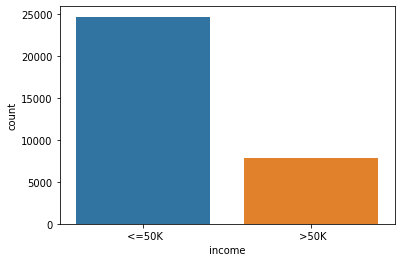

In [44]:
sns.countplot(x = base_census['income'])

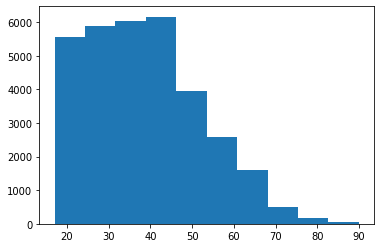

In [45]:
plt.hist(x = base_census['age']);

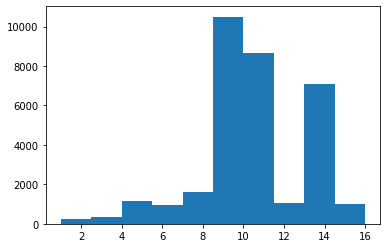

In [46]:
plt.hist(x = base_census['education-num']);

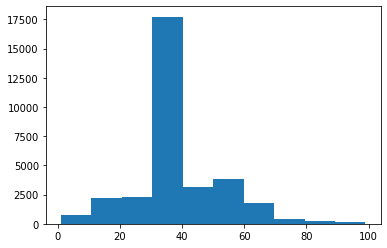

In [47]:
plt.hist(base_census['hour-per-week']);

In [48]:
grafico2 = px.treemap(base_census, path=['workclass','age']) # treemap é interessante para ver o agrupamento dos itens

In [50]:
grafico2.show()

In [51]:
grafico2 = px.treemap(base_census, path=['occupation','relationship','age'])

In [53]:
grafico2.show()

In [54]:
  grafico3 = px.parallel_categories(base_census, dimensions=['occupation','relationship'])
  grafico3.show()

In [55]:
  grafico4 = px.parallel_categories(base_census, dimensions=['workclass','occupation','income'])
  grafico4.show()

In [56]:
  grafico5 = px.parallel_categories(base_census, dimensions=['education','income']) #aqui vemos o nivel educacional com o nivel que a pessoa ganha
  grafico5.show()

In [57]:
#DIVISAO ENTRE PREVISORES E CLASSE
X_census = base_census.iloc[:,0:14].values  # var preditoras, nao entra a classe que queremos prever # sem a var income

In [58]:
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [59]:
Y_census = base_census.iloc[:,14].values #aui sim entra só a classe que queremos prever#income

In [60]:
Y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [61]:
#TRATAMENTO DE ATRIBUTOS CATEGORICOS

#LabelEncoder  === #tranf dados categoricos strings em numericos

from sklearn.preprocessing import LabelEncoder

In [62]:
label_encoder_teste = LabelEncoder()

In [63]:
teste = label_encoder_teste.fit_transform(X_census[:,1])

In [64]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [65]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])  # todas colunas que nao eram nXumericas agora são

In [66]:
X_census[0]  #VERIFICANDO SE AS STRINGS VIRARAM NUMEROS

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

In [67]:
X_census  # TODOS DADOS NUMERICOS COMO QUERIAMOS PARA USARMOS ML

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [68]:
#OnHotEncoder --faz com que o adados ssejam tratados da mesma forma pelo algoritimo, sem nenhum atributo ser masi importante do que o outro

len(np.unique(base_census['workclass']))

9

In [69]:
len(np.unique(base_census['occupation']))

15

In [70]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencoder_census = ColumnTransformer(transformers = [('onehot',OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [71]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [72]:
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [73]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [74]:
X_census.shape  # 108 colunas agora indica o somatorio dos valores unicos

(32561, 108)

In [75]:
#ESCALONAMENTO DOS VALORES   para deixar tudo na mesma escala

from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)


In [76]:
X_census[0]  #tudo na mesma escaa pronto

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

In [77]:
#Treino e teste

from sklearn.model_selection import train_test_split

In [78]:
x_credit_treinamento, x_credit_teste, Y_credit_treinamento, Y_credit_teste = train_test_split(x_credit, Y_credit, test_size = 0.25, random_state = 0)

In [79]:
x_credit_treinamento.shape # 75% dos dados para treinar e 25 % para testar

(1500, 3)

In [80]:
Y_credit_treinamento.shape

(1500,)

In [81]:
x_credit_teste.shape

(500, 3)

In [82]:
Y_credit_teste.shape

(500,)

In [83]:
X_census_treinamento, X_census_teste, Y_census_treinamento, Y_census_teste = train_test_split(X_census, Y_census, test_size = 0.15, random_state = 0)

In [84]:
X_census_treinamento.shape  # 85% do dados para treinar e 15% dos dados para testar

(27676, 108)

In [85]:
Y_census_treinamento.shape

(27676,)

In [86]:
X_census_teste.shape

(4885, 108)

In [87]:
Y_census_teste.shape

(4885,)

In [88]:
#salvar

import pickle

In [89]:
with open('credit.pkl', mode='wb') as f:
  pickle.dump([x_credit_treinamento, Y_credit_treinamento, x_credit_teste, Y_credit_teste],f)

In [90]:
with open('census.pkl', mode='wb') as f:
  pickle.dump([X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste],f)

In [91]:
base_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [92]:
base_risco_credito

historia divida garantias     renda     risco
0           ruim   alta   nenhuma      0_15      alto
1   desconhecida   alta   nenhuma     15_35      alto
2   desconhecida  baixa   nenhuma     15_35  moderado
3   desconhecida  baixa   nenhuma  acima_35      alto
4   desconhecida  baixa   nenhuma  acima_35     baixo
5   desconhecida  baixa  adequada  acima_35     baixo
6           ruim  baixa   nenhuma      0_15      alto
7           ruim  baixa  adequada  acima_35  moderado
8            boa  baixa   nenhuma  acima_35     baixo
9            boa   alta  adequada  acima_35     baixo
10           boa   alta   nenhuma      0_15      alto
11           boa   alta   nenhuma     15_35  moderado
12           boa   alta   nenhuma  acima_35     baixo
13          ruim   alta   nenhuma     15_35      alto

In [93]:
x_risco_credito = base_risco_credito.iloc[:,0:4].values

In [94]:
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [95]:
y_risco_credito = base_risco_credito.iloc[:,4].values

In [96]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [97]:
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [98]:
x_risco_credito[:,0] = label_encoder_historia.fit_transform(x_risco_credito[:,0])
x_risco_credito[:,1] = label_encoder_divida.fit_transform(x_risco_credito[:,1])
x_risco_credito[:,2] = label_encoder_garantia.fit_transform(x_risco_credito[:,2])
x_risco_credito[:,3] = label_encoder_renda.fit_transform(x_risco_credito[:,3])

In [99]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [100]:
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([x_risco_credito,y_risco_credito],f)

In [101]:
#ALGORITIMO ARVORE DE DECISÃO

from sklearn.tree import DecisionTreeClassifier

In [103]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  x_risco_credito, y_risco_credito = pickle.load(f)

In [104]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [105]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [106]:
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
arvore_risco_credito.fit(x_risco_credito, y_risco_credito)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [107]:
arvore_risco_credito.feature_importances_

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

In [113]:
arvore_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

[Text(279.0, 489.24, 'renda <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(111.6, 380.52000000000004, 'renda <= 0.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(55.8, 271.8, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]\nclass = alto'),
 Text(167.39999999999998, 271.8, 'Divida <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(111.6, 163.08000000000004, 'Historia <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]\nclass = alto'),
 Text(55.8, 54.360000000000014, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(167.39999999999998, 54.360000000000014, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = alto'),
 Text(223.2, 163.08000000000004, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(446.4, 380.52000000000004, 'Historia <= 1.5\nentropy = 1.149\nsamples = 7\nvalue = [1, 5, 1]\nclass = baixo'),
 Text(390.59999999999997, 271.8, 'Historia <= 

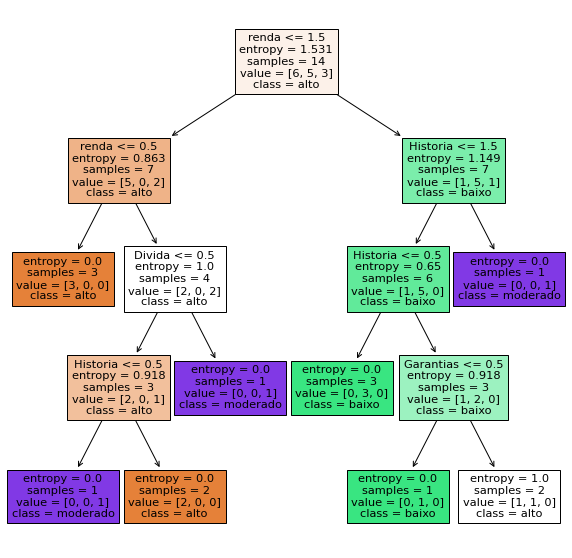

In [114]:
from sklearn import tree
previsores =['Historia','Divida','Garantias','renda']
figura, eixos = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
tree.plot_tree(arvore_risco_credito, feature_names=previsores, class_names=arvore_risco_credito.classes_, filled=True)

In [116]:
#historia boa, divida alta, garantias nenhuma, renda >35
#historia ruim, divida alta, garantias adequada, renda<15

previsoes = arvore_risco_credito.predict([[0,0,1,2],[2,0,0,0]])
previsoes

array(['baixo', 'alto'], dtype=object)

In [117]:
# base credit_data

with open('credit.pkl', 'rb') as f:
  x_credit_treinamento, Y_credit_treinamento, x_credit_teste, Y_credit_teste = pickle.load(f)

In [118]:
x_credit_treinamento.shape, Y_credit_treinamento.shape

((1500, 3), (1500,))

In [119]:
x_credit_teste.shape, Y_credit_teste.shape

((500, 3), (500,))

In [121]:
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(x_credit_treinamento, Y_credit_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [122]:
previsoes = arvore_credit.predict(x_credit_teste)  #modelo treinado
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [123]:
Y_credit_teste # base que temos para compararmos com o modelo acima

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [124]:
from sklearn.metrics import accuracy_score, classification_report

In [125]:
accuracy = accuracy_score(Y_credit_teste, previsoes)

In [126]:
accuracy # nosso modelo tem 93% de acuracia, excelente!!!!

0.982

0.982

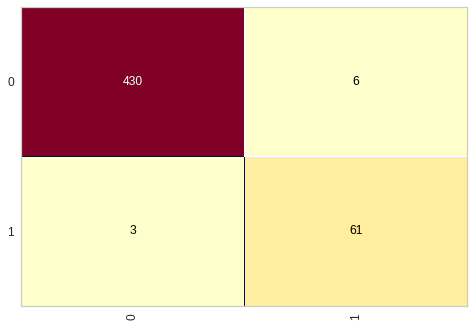

In [127]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, Y_credit_treinamento)
cm.score(x_credit_teste,Y_credit_teste)
    
                

In [128]:
print(classification_report(Y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [131]:
arvore_credit.classes_

array([0, 1])

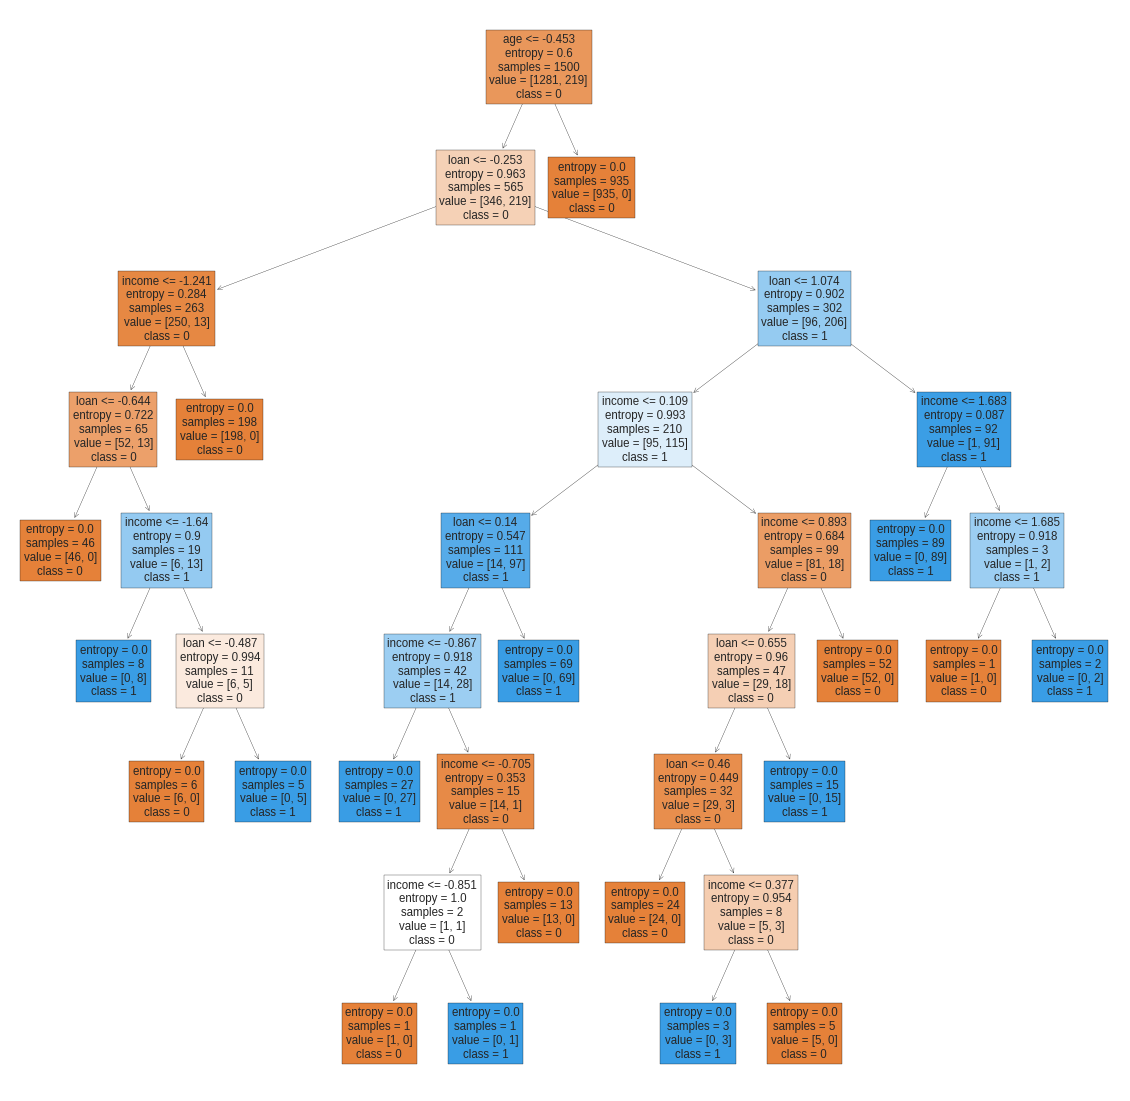

In [135]:
from sklearn import tree
previsores = ['income','age','loan']
fig, axes= plt.subplots(nrows=1,ncols=1, figsize=(20,20))
tree.plot_tree(arvore_credit,feature_names=previsores, class_names=['0','1'] , filled=True);
fig.savefig('arvore_credit.png')


In [136]:
#base census

with open('census.pkl', 'rb') as f:
  X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [137]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 108), (27676,))

In [138]:
X_census_teste.shape, Y_census_teste.shape

((4885, 108), (4885,))

In [139]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, Y_census_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [140]:
previsoes = arvore_census.predict(X_census_teste) # modelo criado

In [141]:
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [142]:
Y_census_teste #dados que tinhamos para a compara com o modelo acima

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [144]:
accuracy_score(Y_census_teste, previsoes)  # bom modelo 81% de acuracia, melhor do que o modelo de naives bayes que resultou em 47% de acuracia

0.8104401228249745

0.8104401228249745

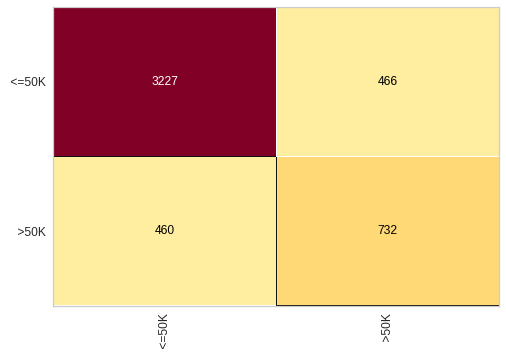

In [147]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste,Y_census_teste)

In [148]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



Portanto vimos o modelo do algoritimo de **arvore de decisão** implementados em 3 datasets, vimos uma acuracia excelente na base de dados credito(93%) e uma boa acuracia na base census de 81%, se compararamos com o modelo do algoritimo de Naives Bayes tiveos uma melhora muit grande na nase census, ou seja, o algorotimo de arvore de decisao foi melhor do que o algoritimo de** naives bayes** para estes casos.